# Final Project

In [1]:
from matplotlib import pyplot as plt
import gc
import numpy as np
import pandas as pd
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop, adam, Adadelta, sgd
import keras
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Loading the input dataset

In [2]:
data = pd.read_csv('data_breast_cancer.csv')
X  = data.iloc[:, 2:-1].values
Y_train = data.iloc[:, 1].values

Y = np.array(Y_train == 'M')
Y = 1*Y    #Setting values to 1 or 0 for training
Y = Y.reshape(569, 1)
X = (X -np.min(X))/(np.max(X)-np.min(X))
print(X.shape, Y.shape)

(569, 30) (569, 1)


Splitting into training and testing data

In [3]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15) 
print(train_X.shape, train_Y.shape)
total_data = np.concatenate((train_Y, train_X), axis = 1)
print(train_X.shape, train_Y.shape)


(483, 30) (483, 1)
(483, 30) (483, 1)


In [4]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

Function for plotting loss function

In [5]:
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

This is the first model. TanH is used as activation function. The layer structure is 30x20x5x1. The dropout rate, regularization parameter and optimizer is taken as inputs

In [6]:
def init_model_1(drop_rate, regularized, optimized):
    model = Sequential()               #creating the model
    model.add(Dense(20, activation = 'tanh', input_dim=30))
    model.add(Dropout(drop_rate))
    model.add(Dense(5, activation = 'tanh', kernel_regularizer=regularized))
    model.add(Dropout(drop_rate))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimized, metrics=['accuracy'])          #compiling the model
    return model

This is the second model. ReLU is used as activation function. The layer structure is 30x64x32x14x4x1. The dropout rate, regularization parameter and optimizer is taken as inputs

In [7]:
def init_model_2(drop_rate, regularized, optimized):
    model = Sequential()                                   #creating the model
    model.add(Dense(64, activation = 'relu', input_dim=30))
    model.add(Dropout(drop_rate))
    model.add(Dense(32, activation = 'relu', kernel_regularizer=regularized))
    model.add(Dropout(drop_rate))
    model.add(Dense(16, activation = 'relu', kernel_regularizer=regularized))
    model.add(Dropout(drop_rate))
    model.add(Dense(4, activation = 'relu', kernel_regularizer=regularized))
    model.add(Dropout(drop_rate))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimized, metrics=['accuracy'])   #compiling the model
    return model

These are the various optimizers that are used

In [8]:
optimizer_sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=True)
optimizer_Adadelta = keras.optimizers.Adadelta()
optimizer_rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
optimizer_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

This is the L2 Regularization that is used

In [9]:
reguliarizer_L2 = keras.regularizers.l2(0.4)

Here the regularizers, optimizers, and various dropout rates are stored in arrays to be used later

In [10]:
opti_arr = [optimizer_sgd, optimizer_Adadelta, optimizer_rms, optimizer_adam] #optimizer array
regul_arr = [None, reguliarizer_L2]              #regularizer array
drop_arr = [0.5, 0.3, 0]                      #dropout array

Here the first model is called. The function is called inside loops of optimizers, regularizers and dropout rates. Each iteration thus becomes a different combination of the above

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.SGD object at 0x000001A83E9EDA58> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.927536231884058
Testing Accuracy 0.8953488372093024


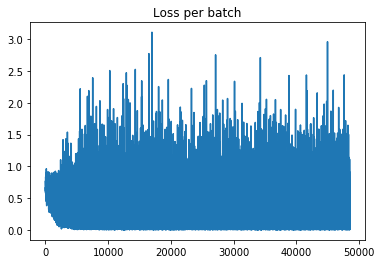

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.SGD object at 0x000001A83E9EDA58> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.9213250517598344
Testing Accuracy 0.872093023255814


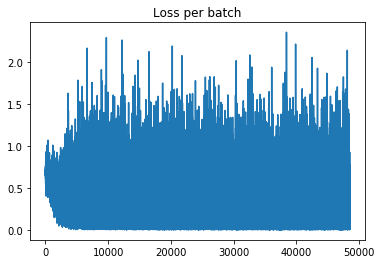

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.SGD object at 0x000001A83E9EDA58> Regularizer: None Dropout Rate: 0
Training Accuracy 0.9254658385093167
Testing Accuracy 0.9069767441860465


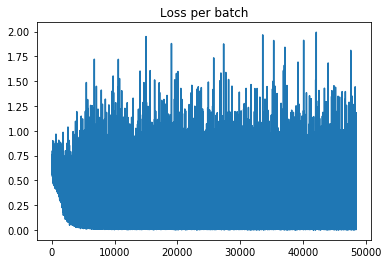

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.SGD object at 0x000001A83E9EDA58> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.5
Training Accuracy 0.9089026915113871
Testing Accuracy 0.8488372093023255


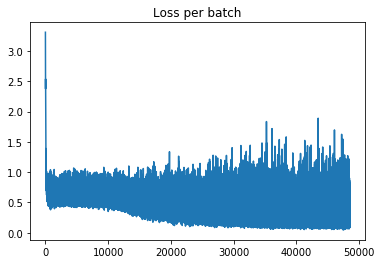

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.SGD object at 0x000001A83E9EDA58> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.3
Training Accuracy 0.906832298136646
Testing Accuracy 0.8604651162790697


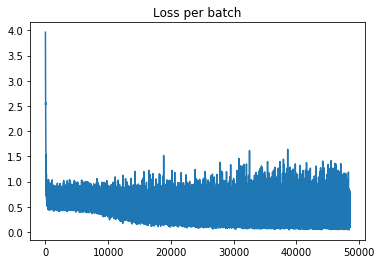

86/86 [==============================] - 0s 927us/step
Optimizer: <keras.optimizers.SGD object at 0x000001A83E9EDA58> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0
Training Accuracy 0.906832298136646
Testing Accuracy 0.8488372093023255


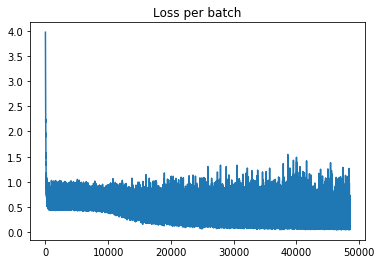

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001A8AB7EF6A0> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9420289855072463
Testing Accuracy 0.9418604651162791


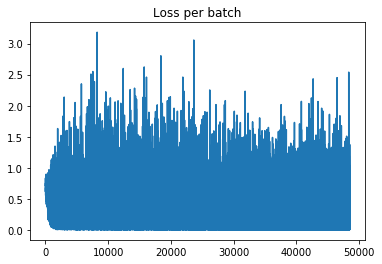

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001A8AB7EF6A0> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.9337474120082816
Testing Accuracy 0.9767441860465116


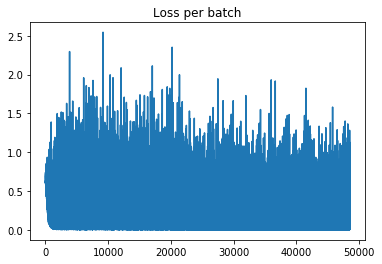

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001A8AB7EF6A0> Regularizer: None Dropout Rate: 0
Training Accuracy 0.9399585921325052
Testing Accuracy 0.9186046511627907


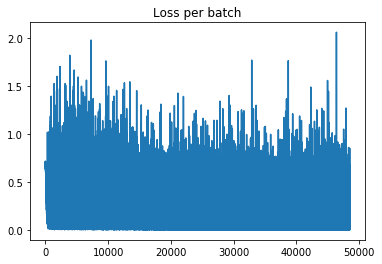

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001A8AB7EF6A0> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.5
Training Accuracy 0.9233954451345756
Testing Accuracy 0.8837209302325582


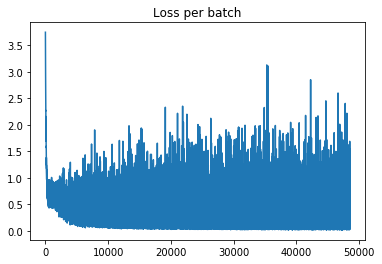

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001A8AB7EF6A0> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.3
Training Accuracy 0.9213250517598344
Testing Accuracy 0.8837209302325582


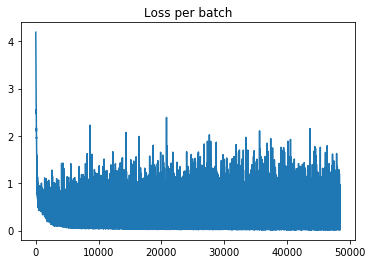

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001A8AB7EF6A0> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0
Training Accuracy 0.9233954451345756
Testing Accuracy 0.8837209302325582


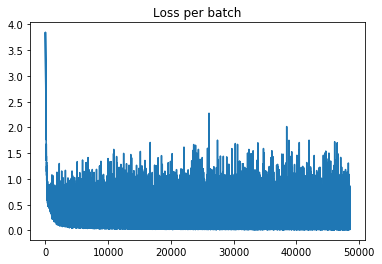

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001A8AB7EF908> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9399585921325052
Testing Accuracy 0.9651162790697675


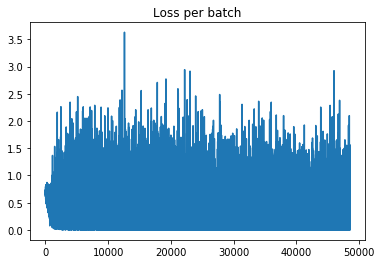

86/86 [==============================] - 0s 592us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001A8AB7EF908> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.94824016563147
Testing Accuracy 0.9651162790697675


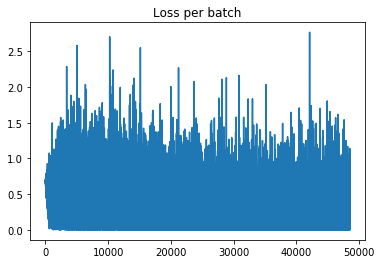

86/86 [==============================] - 0s 545us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001A8AB7EF908> Regularizer: None Dropout Rate: 0
Training Accuracy 0.94824016563147
Testing Accuracy 0.9651162790697675


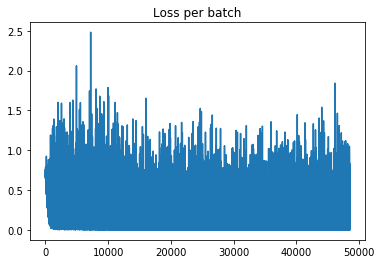

86/86 [==============================] - 0s 638us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001A8AB7EF908> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.5
Training Accuracy 0.917184265010352
Testing Accuracy 0.872093023255814


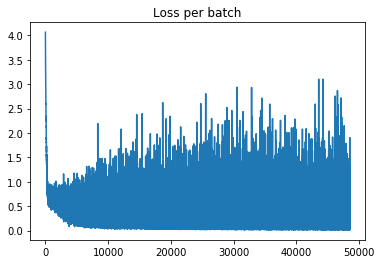

86/86 [==============================] - 0s 661us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001A8AB7EF908> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.3
Training Accuracy 0.9213250517598344
Testing Accuracy 0.8953488372093024


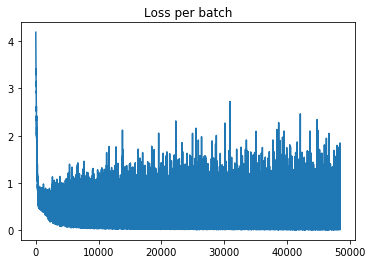

86/86 [==============================] - 0s 719us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001A8AB7EF908> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0
Training Accuracy 0.9254658385093167
Testing Accuracy 0.9069767441860465


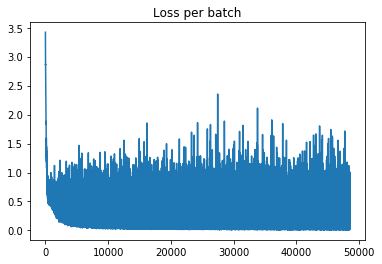

86/86 [==============================] - 0s 569us/step
Optimizer: <keras.optimizers.Adam object at 0x000001A8AB7EFA58> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9399585921325052
Testing Accuracy 0.9302325581395349


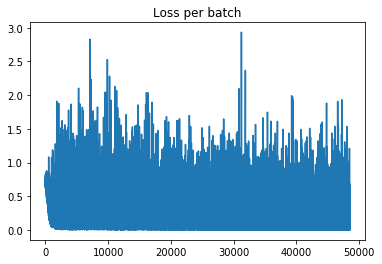

86/86 [==============================] - 0s 533us/step
Optimizer: <keras.optimizers.Adam object at 0x000001A8AB7EFA58> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.94824016563147
Testing Accuracy 0.9651162790697675


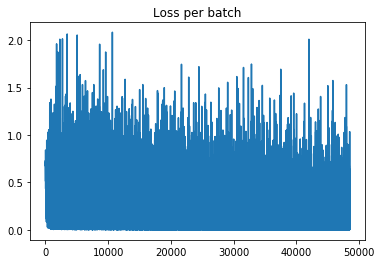

86/86 [==============================] - 0s 812us/step
Optimizer: <keras.optimizers.Adam object at 0x000001A8AB7EFA58> Regularizer: None Dropout Rate: 0
Training Accuracy 0.9523809523809523
Testing Accuracy 0.9534883720930233


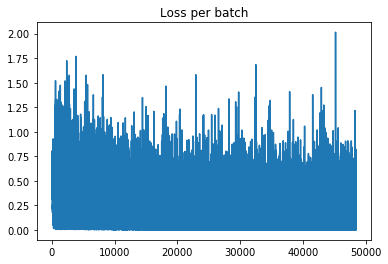

86/86 [==============================] - 0s 1ms/step
Optimizer: <keras.optimizers.Adam object at 0x000001A8AB7EFA58> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.5
Training Accuracy 0.9233954451345756
Testing Accuracy 0.8837209302325582


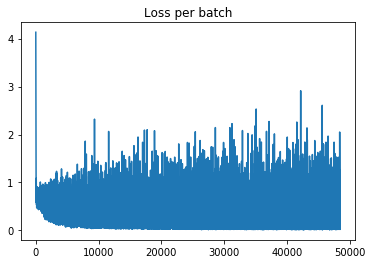

86/86 [==============================] - 0s 569us/step
Optimizer: <keras.optimizers.Adam object at 0x000001A8AB7EFA58> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0.3
Training Accuracy 0.9254658385093167
Testing Accuracy 0.9069767441860465


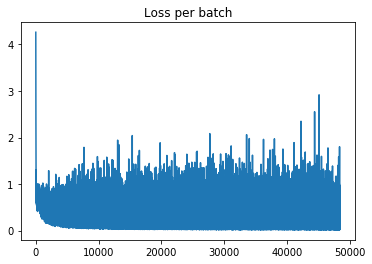

86/86 [==============================] - 0s 499us/step
Optimizer: <keras.optimizers.Adam object at 0x000001A8AB7EFA58> Regularizer: <keras.regularizers.L1L2 object at 0x000001A83E976080> Dropout Rate: 0
Training Accuracy 0.9296066252587992
Testing Accuracy 0.9186046511627907


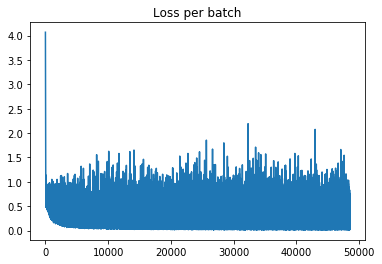

In [133]:
for optimize in opti_arr:
    for regularize in regul_arr:
        for drop in drop_arr:
            model = init_model_1(drop, regularize, optimize)  # create the neural network model
            history = LossHistory()  
            model.fit(train_X,train_Y, epochs=500, batch_size=5, #fit the model
                            callbacks=[history], verbose =0)
                            #validation_data=(test_X, test_Y), verbose=2)  # train the model
            train_score = model.evaluate(train_X, train_Y, batch_size=2)
            test_score = model.evaluate(test_X, test_Y, batch_size=2) # evaluate the model
            print('Optimizer:', optimize, 'Regularizer:', regularize, 'Dropout Rate:', drop)
            print('Training Accuracy', train_score[1])
            print('Testing Accuracy', test_score[1])   #print the values
            plot_losses(history.losses)

Here the second model is called. The function is called inside loops of optimizers, regularizers and dropout rates. Each iteration thus becomes a different combination of the above. The training and testing accuracy is printed and the loss function is plotted





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
86/86 [==============================] - 0s 328us/step
Optimizer: <keras.optimizers.SGD object at 0x000001FB1BC83B00> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9047619047619048
Testing Accuracy 0.9418604651162791


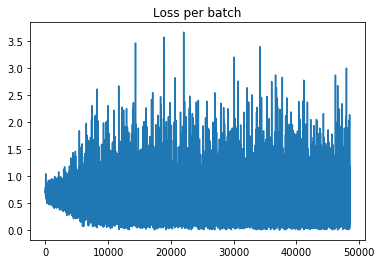

86/86 [==============================] - 0s 279us/step
Optimizer: <keras.optimizers.SGD object at 0x000001FB1BC83B00> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.9089026915113871
Testing Accuracy 0.9534883720930233


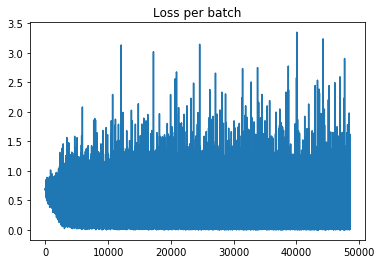

86/86 [==============================] - 0s 371us/step
Optimizer: <keras.optimizers.SGD object at 0x000001FB1BC83B00> Regularizer: None Dropout Rate: 0
Training Accuracy 0.917184265010352
Testing Accuracy 0.9418604651162791


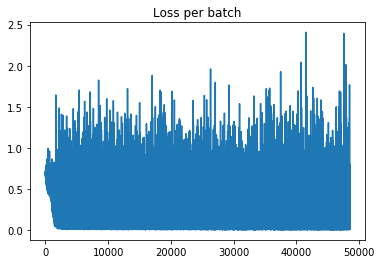

86/86 [==============================] - 0s 325us/step
Optimizer: <keras.optimizers.SGD object at 0x000001FB1BC83B00> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.5
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


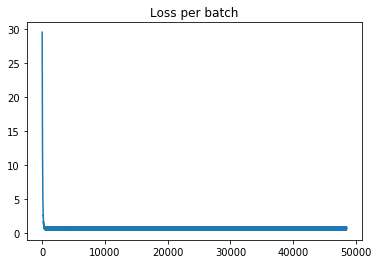

86/86 [==============================] - 0s 324us/step
Optimizer: <keras.optimizers.SGD object at 0x000001FB1BC83B00> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.3
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


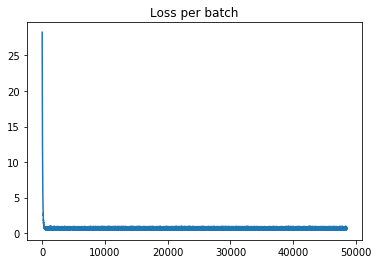

86/86 [==============================] - 0s 209us/step
Optimizer: <keras.optimizers.SGD object at 0x000001FB1BC83B00> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


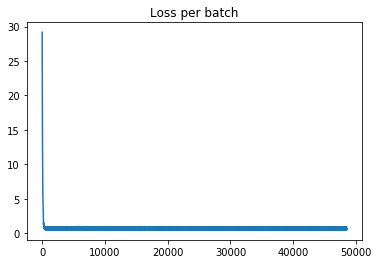

86/86 [==============================] - 0s 255us/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001FB1BC83CF8> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9399585921325052
Testing Accuracy 0.9534883720930233


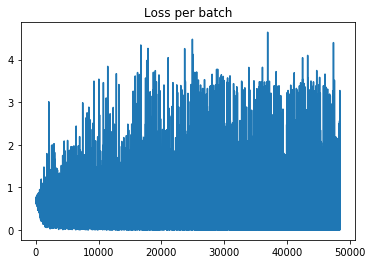

86/86 [==============================] - 0s 265us/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001FB1BC83CF8> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.9420289855072463
Testing Accuracy 0.9651162790697675


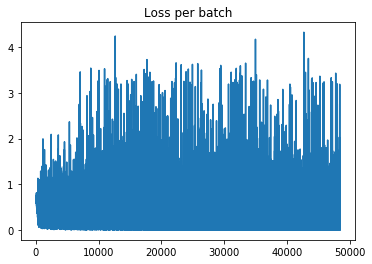

86/86 [==============================] - 0s 232us/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001FB1BC83CF8> Regularizer: None Dropout Rate: 0
Training Accuracy 0.94824016563147
Testing Accuracy 0.9418604651162791


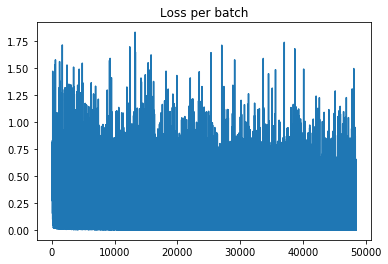

86/86 [==============================] - 0s 348us/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001FB1BC83CF8> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.5
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


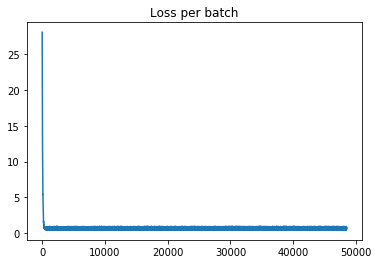

86/86 [==============================] - 0s 336us/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001FB1BC83CF8> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.3
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


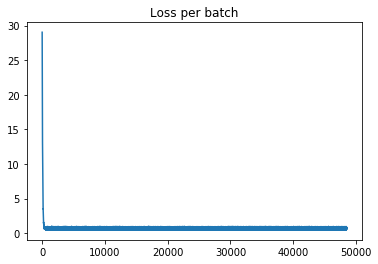

86/86 [==============================] - 0s 279us/step
Optimizer: <keras.optimizers.Adadelta object at 0x000001FB1BC83CF8> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


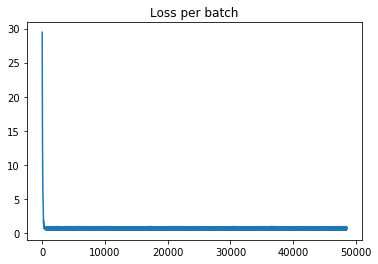

86/86 [==============================] - 0s 267us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001FB1BC83CC0> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9337474120082816
Testing Accuracy 0.9651162790697675


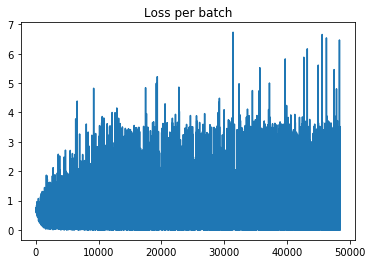

86/86 [==============================] - 0s 348us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001FB1BC83CC0> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.9440993788819876
Testing Accuracy 0.9651162790697675


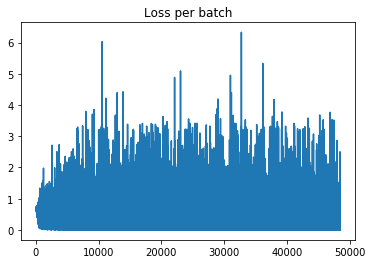

86/86 [==============================] - 0s 278us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001FB1BC83CC0> Regularizer: None Dropout Rate: 0
Training Accuracy 0.9503105590062112
Testing Accuracy 0.9883720930232558


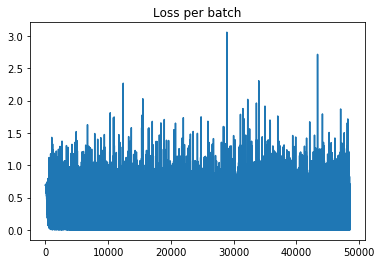

86/86 [==============================] - 0s 360us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001FB1BC83CC0> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.5
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


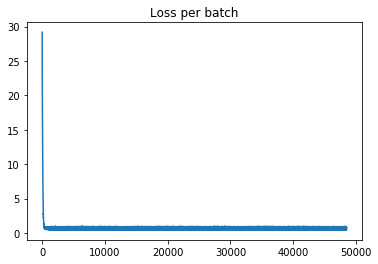

86/86 [==============================] - 0s 281us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001FB1BC83CC0> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.3
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


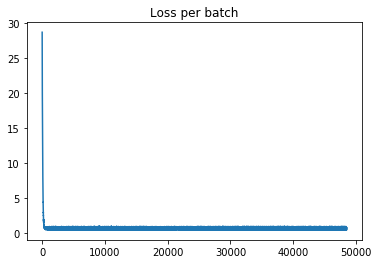

86/86 [==============================] - 0s 348us/step
Optimizer: <keras.optimizers.RMSprop object at 0x000001FB1BC83CC0> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


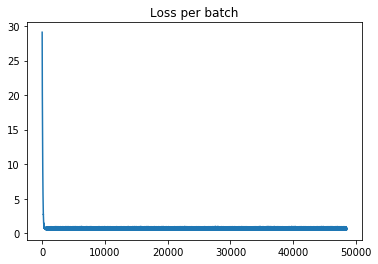

86/86 [==============================] - 0s 359us/step
Optimizer: <keras.optimizers.Adam object at 0x000001FB1BC83D68> Regularizer: None Dropout Rate: 0.5
Training Accuracy 0.9358178053830227
Testing Accuracy 0.9534883720930233


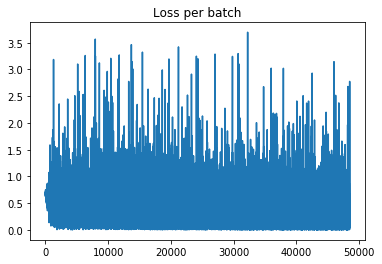

86/86 [==============================] - 0s 812us/step
Optimizer: <keras.optimizers.Adam object at 0x000001FB1BC83D68> Regularizer: None Dropout Rate: 0.3
Training Accuracy 0.9503105590062112
Testing Accuracy 0.9418604651162791


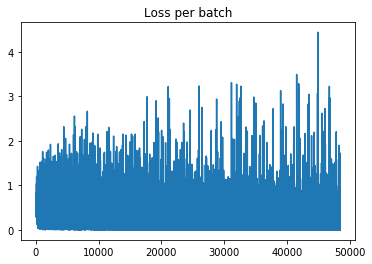

86/86 [==============================] - 0s 324us/step
Optimizer: <keras.optimizers.Adam object at 0x000001FB1BC83D68> Regularizer: None Dropout Rate: 0
Training Accuracy 0.9544513457556936
Testing Accuracy 0.9418604651162791


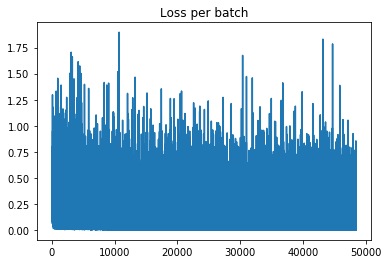

86/86 [==============================] - 0s 742us/step
Optimizer: <keras.optimizers.Adam object at 0x000001FB1BC83D68> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.5
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


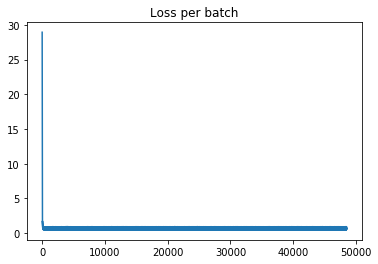

86/86 [==============================] - 0s 348us/step
Optimizer: <keras.optimizers.Adam object at 0x000001FB1BC83D68> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0.3
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


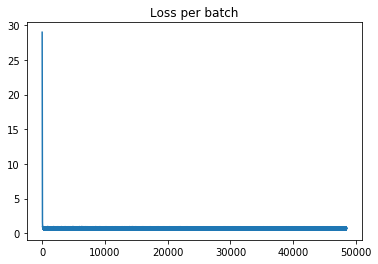

86/86 [==============================] - 0s 336us/step
Optimizer: <keras.optimizers.Adam object at 0x000001FB1BC83D68> Regularizer: <keras.regularizers.L1L2 object at 0x000001FB1BC83390> Dropout Rate: 0
Training Accuracy 0.6107660455486542
Testing Accuracy 0.7209302325581395


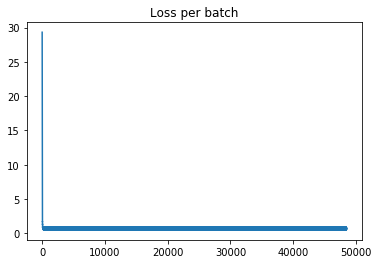

In [11]:
for optimize in opti_arr:
    for regularize in regul_arr:
        for drop in drop_arr:
            model = init_model_2(drop, regularize, optimize)  # create the neural network model
            history = LossHistory()  
            model.fit(train_X,train_Y, epochs=500, batch_size=5,   #fit the model
                            callbacks=[history], verbose = 0)
                           # validation_data=(test_X, test_Y), verbose=0)  # train the model
            train_score = model.evaluate(train_X, train_Y, batch_size=2)
            test_score = model.evaluate(test_X, test_Y, batch_size=2) # evaluate the model
            print('Optimizer:', optimize, 'Regularizer:', regularize, 'Dropout Rate:', drop)
            print('Training Accuracy', train_score[1])
            print('Testing Accuracy', test_score[1])   #print the values
            plot_losses(history.losses)
            gc.collect()

All the results are shown here. The explanation of results and their analysis are provided in the attached report